In [1]:
import os
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [2]:
pwd

'C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Code\\CODES-Steel'

## Data Input

### Input and Transforms

In [3]:
series_x = read_csv('SteelDataset_2009.csv',parse_dates=[1], index_col=0)
exog_series = read_csv('Exog_Dataset_2009-21.csv',parse_dates=[1], index_col=0)

series_x['Price'] = series_x['Price'].astype(str).astype(float)
series_x.index = pd.to_datetime(series_x.index)

exog_series = exog_series.astype(str).astype(float)
exog_series[['ex_flags_dip','ex_flag_peak']] = exog_series[['ex_flags_dip','ex_flag_peak']].astype(int)
exog_series.index = pd.to_datetime(exog_series.index)

exog_series[['Al_Lag1','Coal_Lag2']] = exog_series[['Al_Lag1','Coal_Lag2']].astype(str).astype(float)
exog_series['ex_flags_dip'] = exog_series['ex_flags_dip'].astype(str).astype(int)
exog_series.index = pd.to_datetime(exog_series.index)

In [4]:
series_x.dtypes

Price    float64
dtype: object

In [5]:
exog_series.dtypes

ex_flags_dip      int32
ex_flag_peak      int32
Al_Lag1         float64
Coal_Lag2       float64
dtype: object

In [6]:
series_x.tail()

,Price
Date,
2019-08-01,625.0
2019-09-01,625.0
2019-10-01,605.0
2019-11-01,590.0
2019-12-01,590.0


## Plot the Data

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


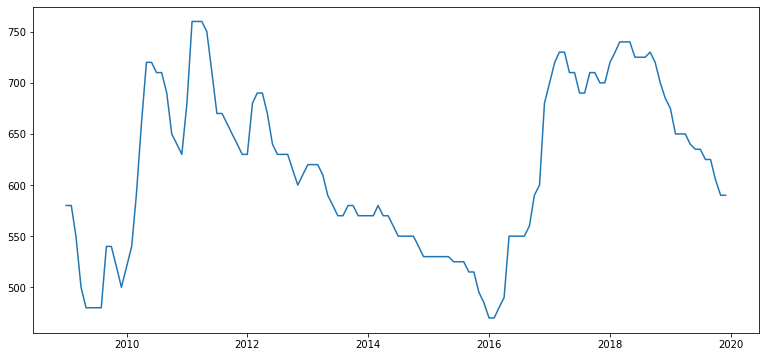

In [7]:
pyplot.figure(figsize = (13,6))
series_x['Price'] = series_x['Price'].astype(str).astype(float)
series_x.index = pd.to_datetime(series_x.index)
pyplot.plot(series_x)
pyplot.show()

## 2 Year Data Split

In [8]:
train_x = series_x[:108]
valid_x = series_x[108:132]
train_x_exog = exog_series[:108]
valid_x_exog = exog_series[108:132]

In [9]:
len(valid_x_exog)

24

## Build the Model

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


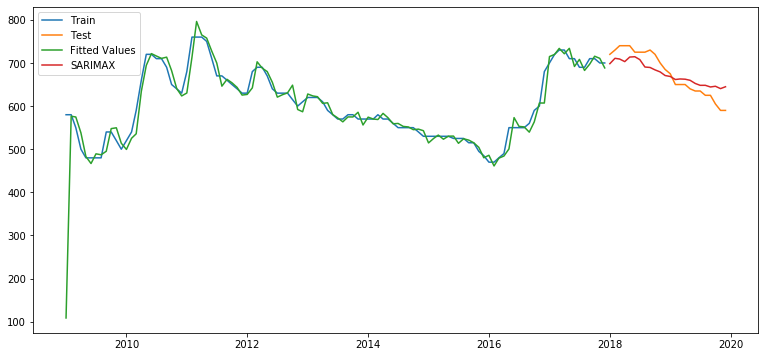

In [11]:
import statsmodels.api as sm

y_hat_avg = valid_x.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,18), exog = train_x_exog).fit()
y_hat_avg['SARIMAX'] = fit1.predict(valid_x.index[0], valid_x.index[len(valid_x)-1],exog = valid_x_exog, dynamic=True)
plt.figure(figsize=(13,6))
plt.plot( train_x['Price'], label='Train')
plt.plot(valid_x['Price'], label='Test')
plt.plot(fit1.fittedvalues, label = "Fitted Values")
plt.plot(y_hat_avg['SARIMAX'], label='SARIMAX')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [12]:
ape =  abs(valid_x['Price'] - y_hat_avg['SARIMAX'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.036855134751461884


## 1 Year Data Split

In [22]:
train_x = series_x[:120]
valid_x = series_x[120:132]
train_x_exog = exog_series[:120]
valid_x_exog = exog_series[120:120+12]

In [20]:
len(series_x[120:])

12

In [23]:
len(valid_x_exog)

12

In [25]:
valid_x_exog.tail()

,ex_flags_dip,ex_flag_peak,Al_Lag1,Coal_Lag2
Date,,,,
2019-08-01,0,0,1816.330000,198.0
2019-09-01,0,0,1771.120000,184.2
2019-10-01,0,0,1776.760000,157.0
2019-11-01,0,0,1727.570000,146.0
2019-12-01,0,1,1760.764406,145.2


## Build the Model

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


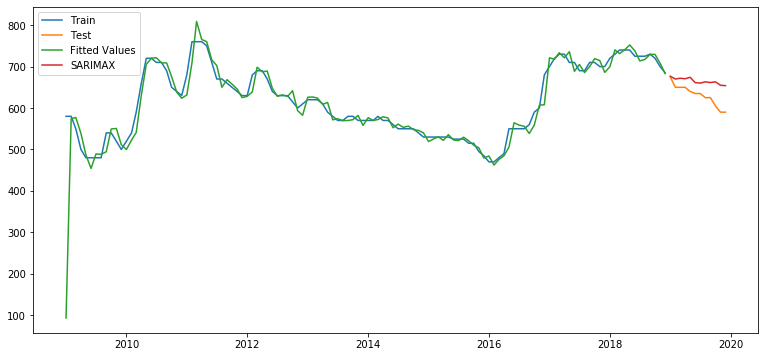

In [26]:
import statsmodels.api as sm

y_hat_avg = valid_x.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,18), exog = train_x_exog).fit()
y_hat_avg['SARIMAX'] = fit1.predict(valid_x.index[0], valid_x.index[len(valid_x)-1],exog = valid_x_exog, dynamic=True)
plt.figure(figsize=(13,6))
plt.plot( train_x['Price'], label='Train')
plt.plot(valid_x['Price'], label='Test')
plt.plot(fit1.fittedvalues, label = "Fitted Values")
plt.plot(y_hat_avg['SARIMAX'], label='SARIMAX')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [28]:
ape =  abs(valid_x['Price'] - y_hat_avg['SARIMAX'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.05560878391558773


## Future 24 Forecasts

### Split the Data

In [29]:
train_x = series_x[:132]
#valid_x = series_x[120:132]
train_x_exog = exog_series[:132]
valid_x_exog = exog_series[132:132+24]

In [30]:
len(valid_x_exog)

24

## Build the Model

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


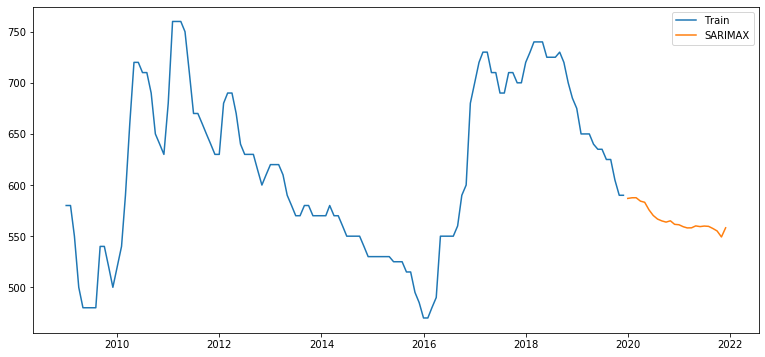

In [31]:
import statsmodels.api as sm

y_hat_avg = valid_x_exog.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,18), exog = train_x_exog).fit()
y_hat_avg['SARIMAX'] = fit1.predict(valid_x_exog.index[0], valid_x_exog.index[len(valid_x_exog)-1],exog = valid_x_exog, dynamic=True)
plt.figure(figsize=(13,6))
plt.plot( train_x['Price'], label='Train')
#plt.plot(valid_x['Price'], label='Test')
#plt.plot(fit1.fittedvalues, label = "Fitted Values")
plt.plot(y_hat_avg['SARIMAX'], label='SARIMAX')
plt.legend(loc='best')
plt.show()

In [32]:
y_hat_avg['SARIMAX']

Date
2020-01-01    586.928058
2020-02-01    587.576109
2020-03-01    587.598715
2020-04-01    584.258600
2020-05-01    583.161088
2020-06-01    575.729972
2020-07-01    570.258385
2020-08-01    566.728592
2020-09-01    564.929996
2020-10-01    563.766382
2020-11-01    565.038654
2020-12-01    561.589346
2021-01-01    561.189867
2021-02-01    559.240817
2021-03-01    558.091073
2021-04-01    558.166968
2021-05-01    560.057409
2021-06-01    559.375621
2021-07-01    559.892366
2021-08-01    559.611932
2021-09-01    557.501294
2021-10-01    555.107135
2021-11-01    549.235448
2021-12-01    558.192023
Name: SARIMAX, dtype: float64

## Accuracy Sheet Loop

In [ ]:
import statsmodels.api as sm
import datetime

accuracy = pd.read_csv("C:\\Users\\TrinaNaskar\\Documents\\Daimler\\Notebooks\\Accuracy_Input_Steel_temp.csv")


# Setting date to index

accuracy['Snap_Month'] = pd.to_datetime(accuracy['Snap_Month'])

accuracy.set_index('Snap_Month', inplace=True)

#print(accuracy)


for i in range(108,132):
    
    train_x = series_x[:i]
    #valid_x = series_x[i:i+24]
    train_x_exog = exog_series[:i]
    valid_x_exog = exog_series[i:i+24]

    y_hat_avg = valid_x_exog.copy()
    fit1 = sm.tsa.statespace.SARIMAX(train_x.Price, order=(1, 0, 4),seasonal_order=(5,0,0,18), exog = train_x_exog).fit()
    y_hat_avg['SARIMAX'] = fit1.predict(valid_x_exog.index[0],valid_x_exog.index[len(valid_x_exog)-1],exog = valid_x_exog, dynamic=True)
    #print(y_hat_avg['ARIMAX'])
    forecast1 = pd.DataFrame({'Prediction': y_hat_avg['SARIMAX']})
    forecast1.set_index(accuracy.index[i-106:i-106+24],inplace=True)
    print(forecast1)
    accuracy=pd.merge(accuracy,forecast1,how='outer',left_index=True,right_index=True)




accuracy.columns = ['A','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24','F25']

print(accuracy)    

accuracy.to_csv("C:\\Users\\TrinaNaskar\\Documents\\Daimler\\Notebooks\\Accuracy_Sheet_Steel_SARIMAX_DecUpdate.csv")


## XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX